# **1: Exploratory Data Analysis (EDA)**

**Step 1 — Load the Dataset**

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("/content/mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


# **Step 2 — Basic Data Exploration**

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df.describe()


,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [5]:
df.isnull().sum()


,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


# **Step 3 — Distribution of Each Feature**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

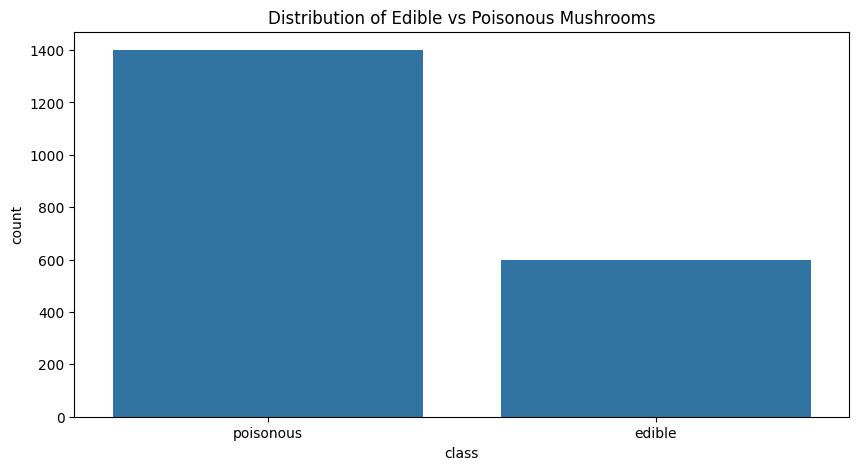

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x='class', data=df)
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.show()

**Plot for all features (optional but useful):**

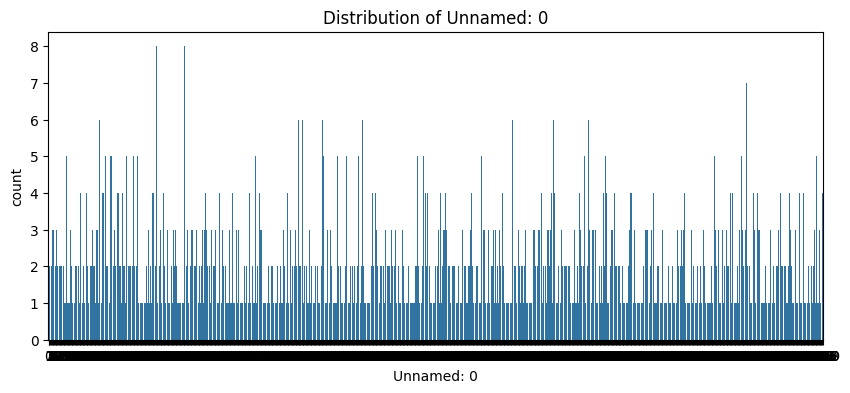

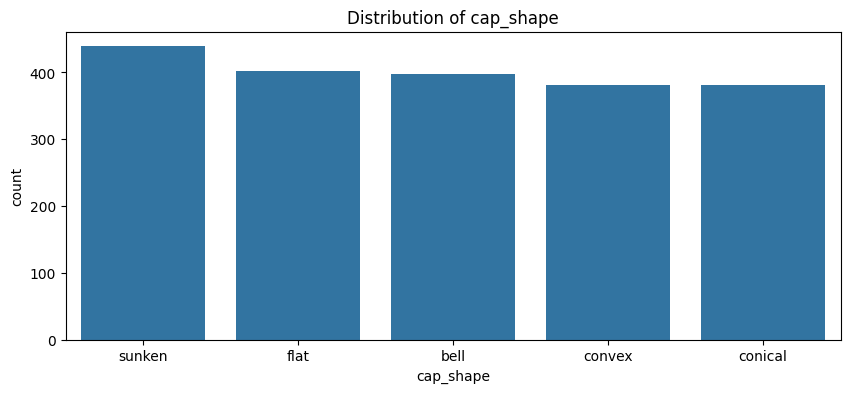

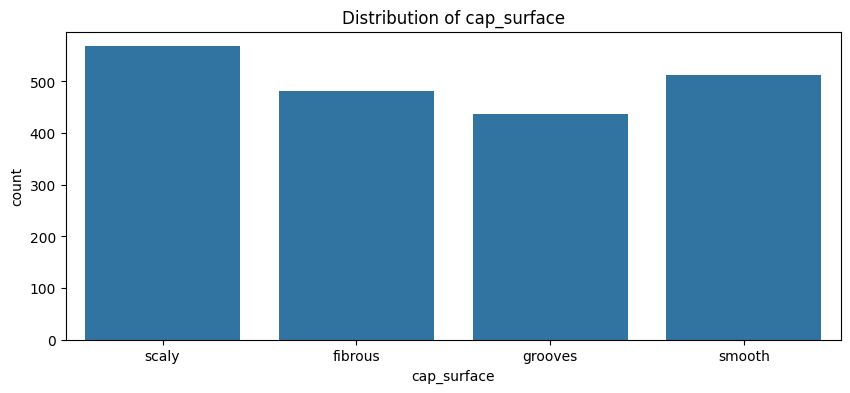

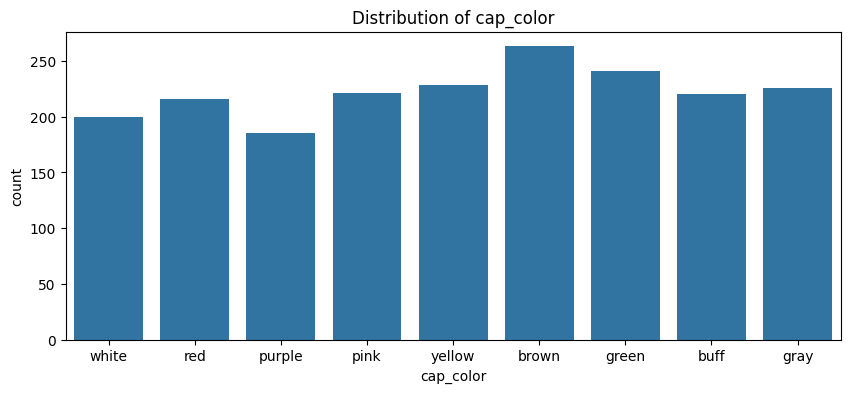

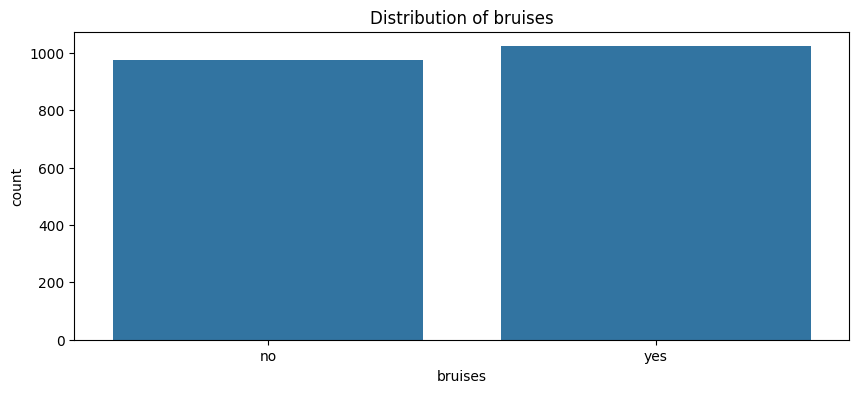

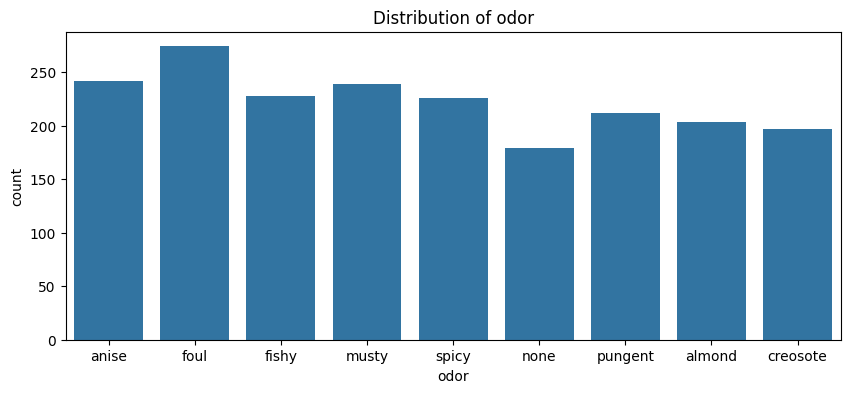

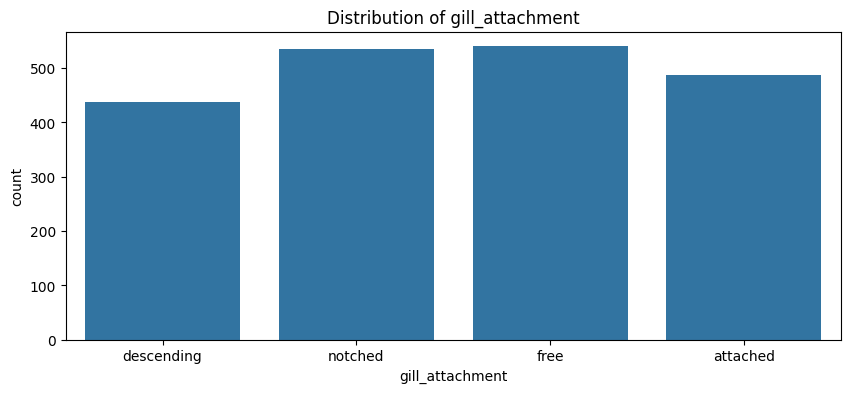

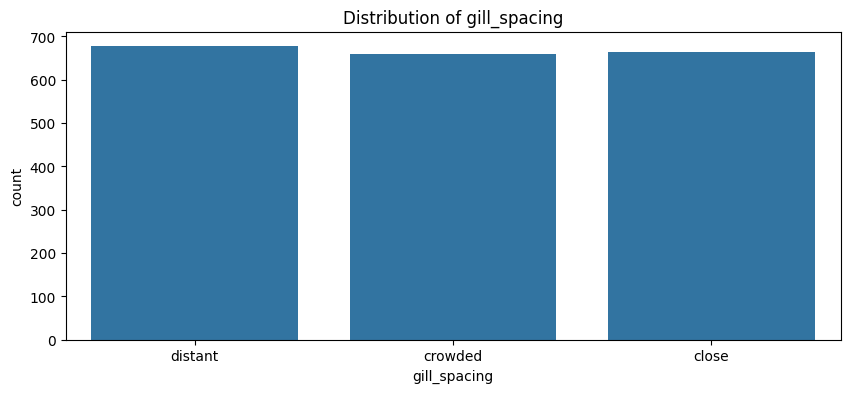

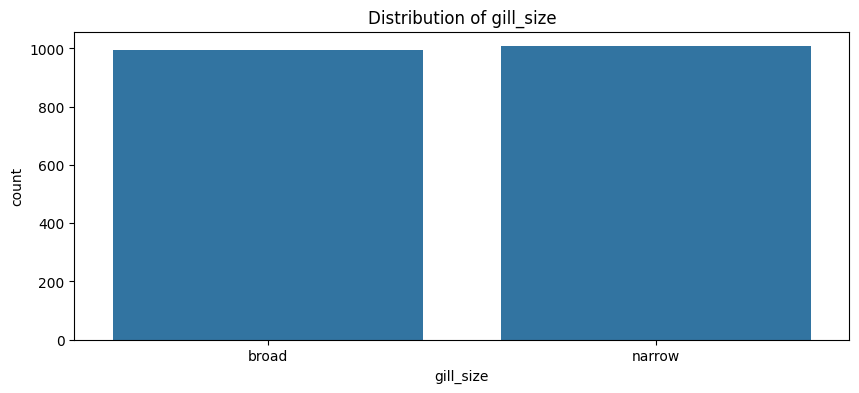

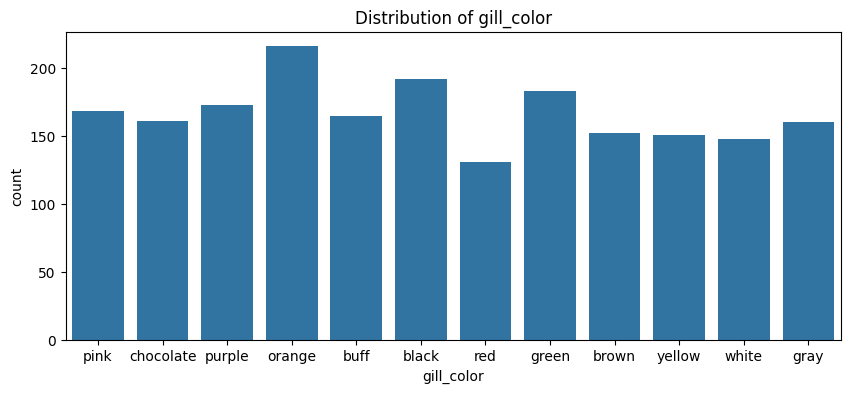

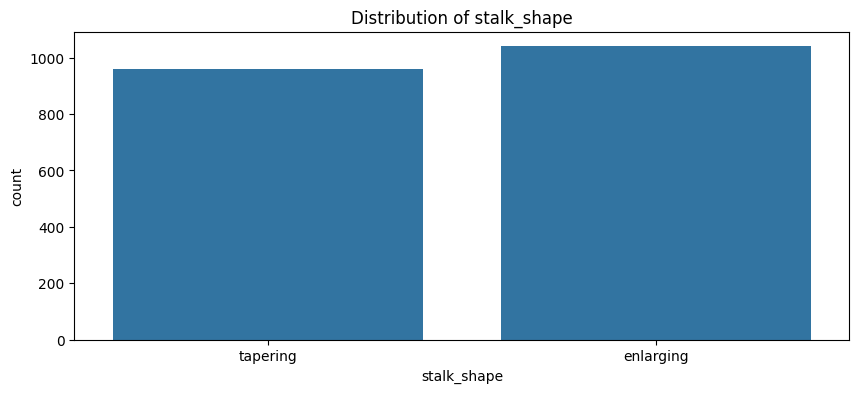

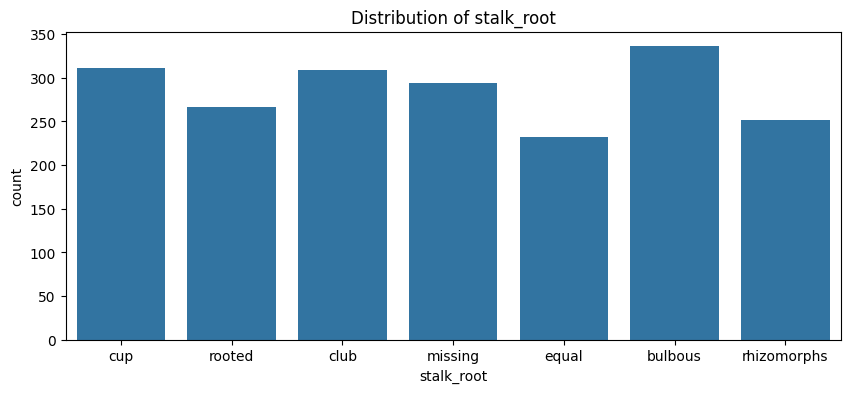

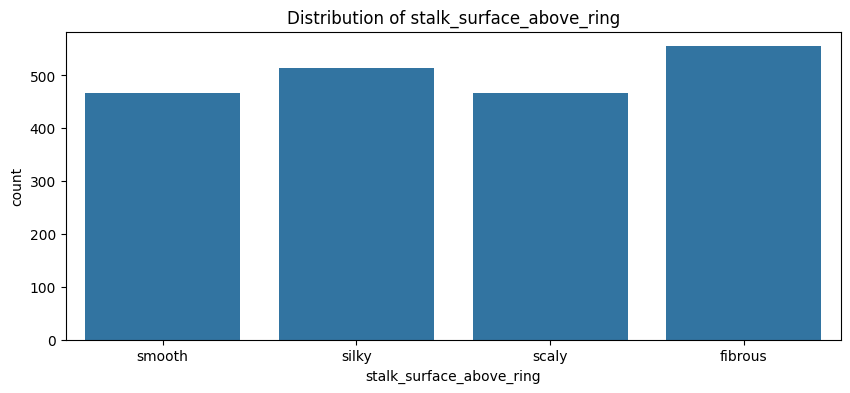

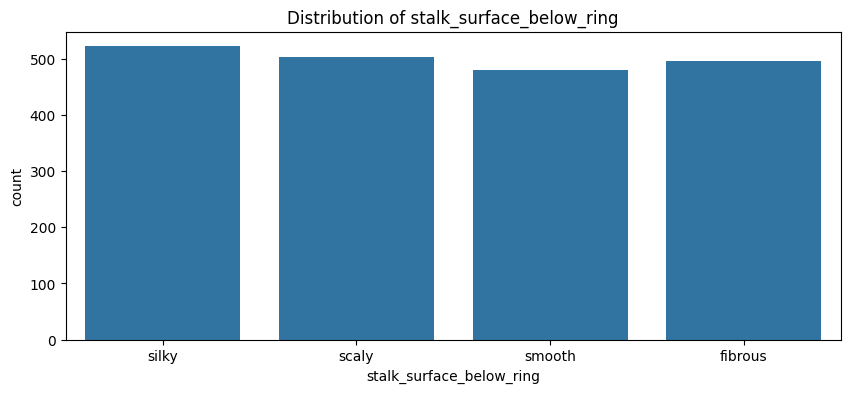

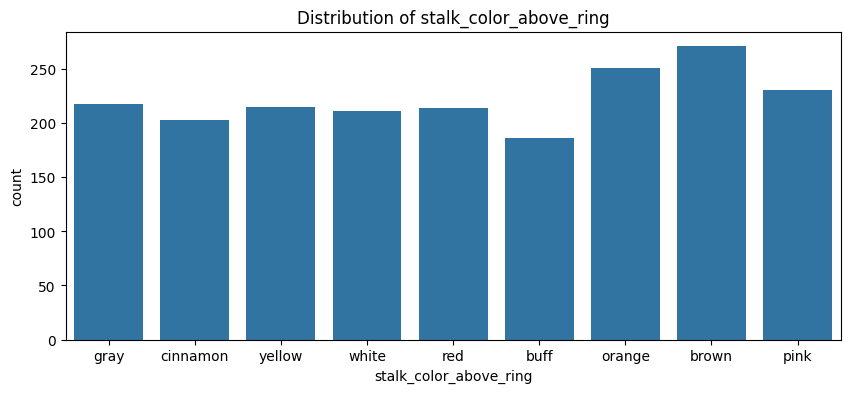

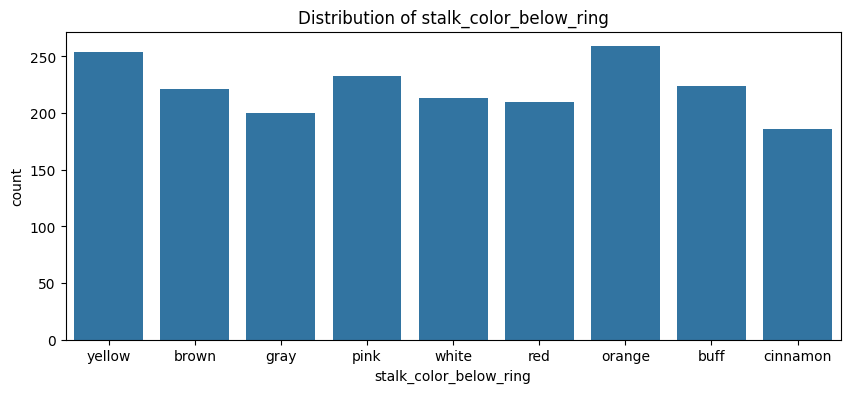

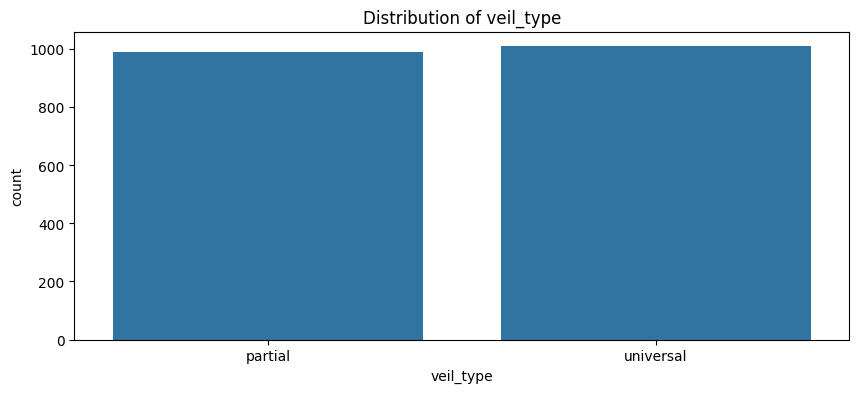

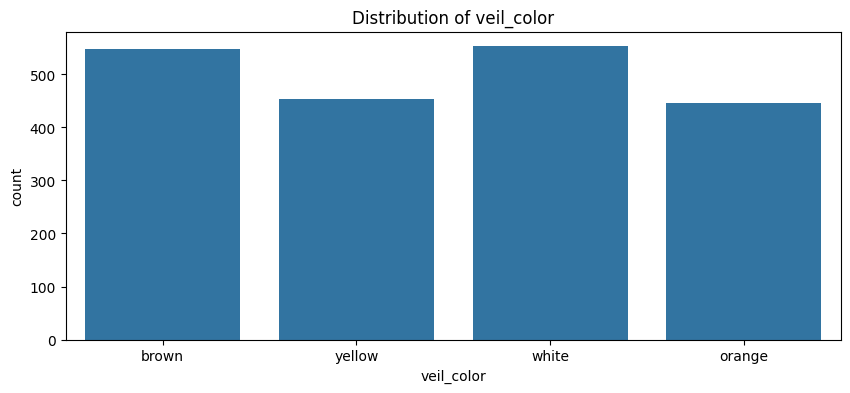

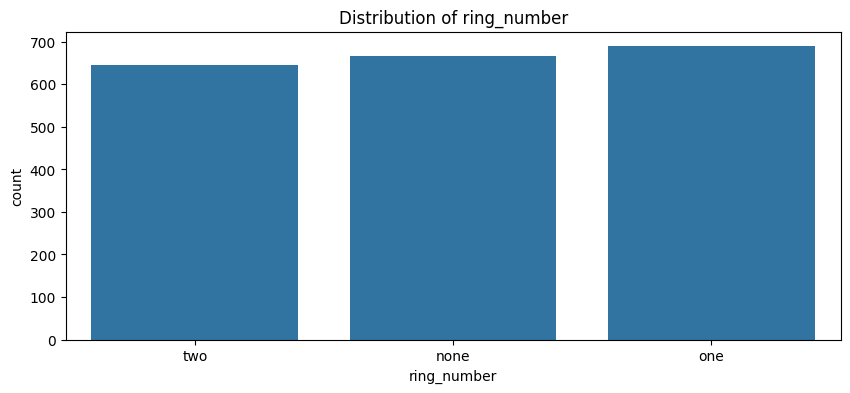

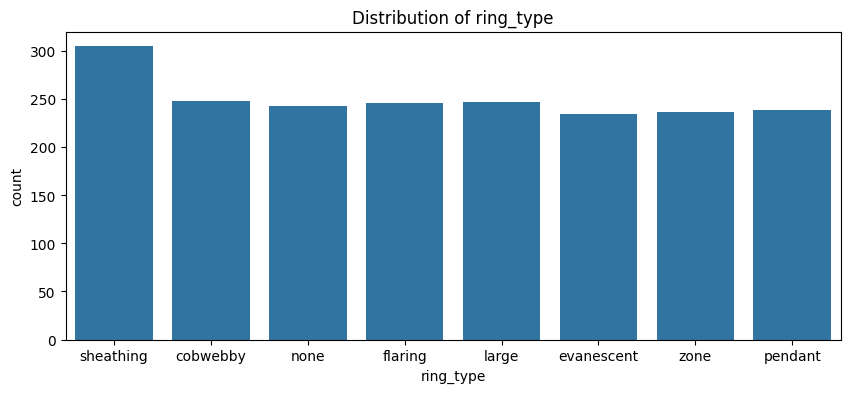

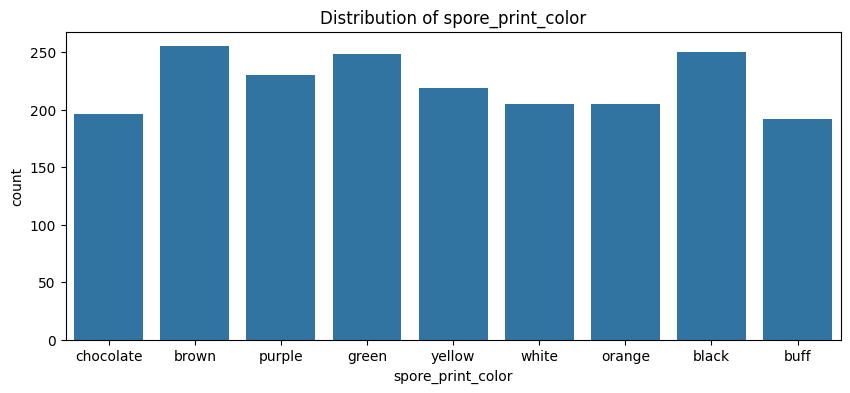

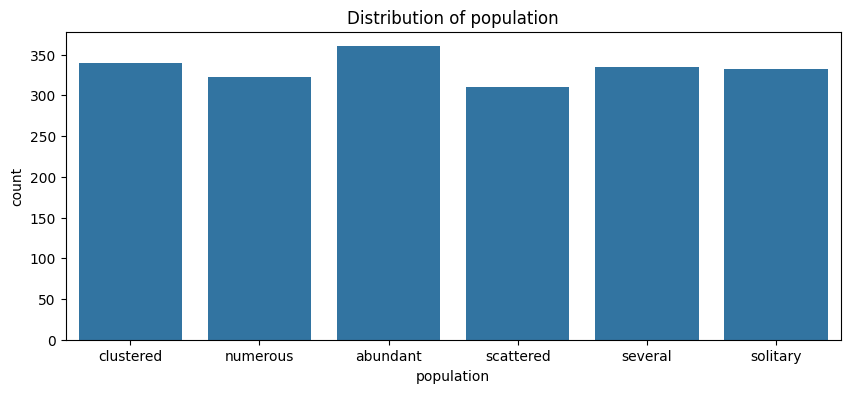

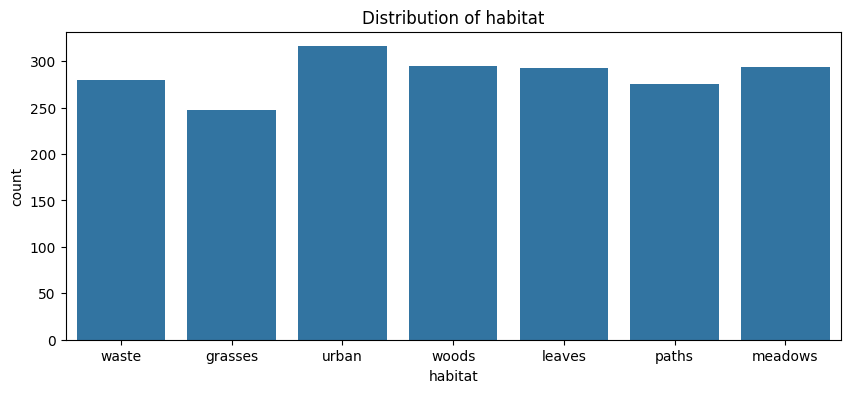

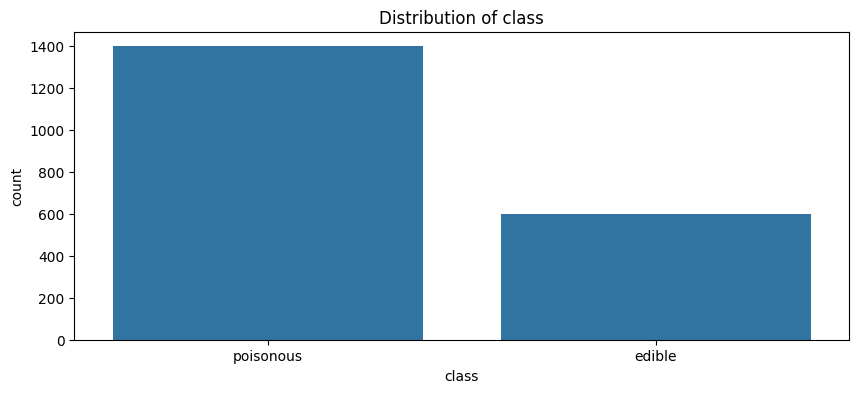

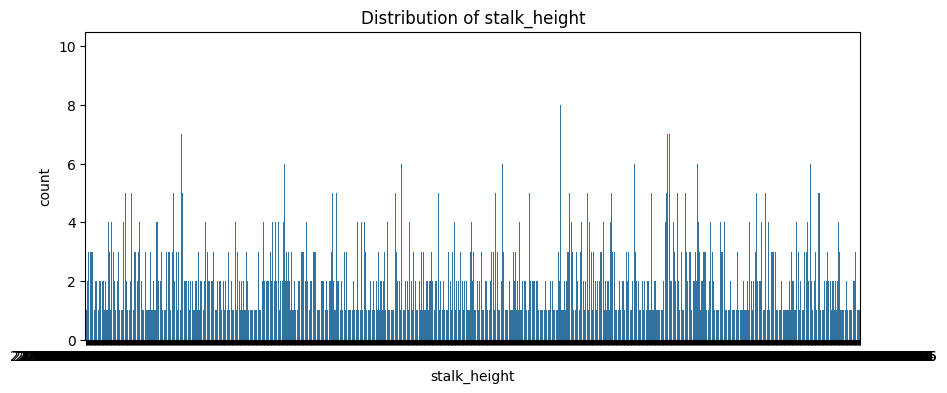

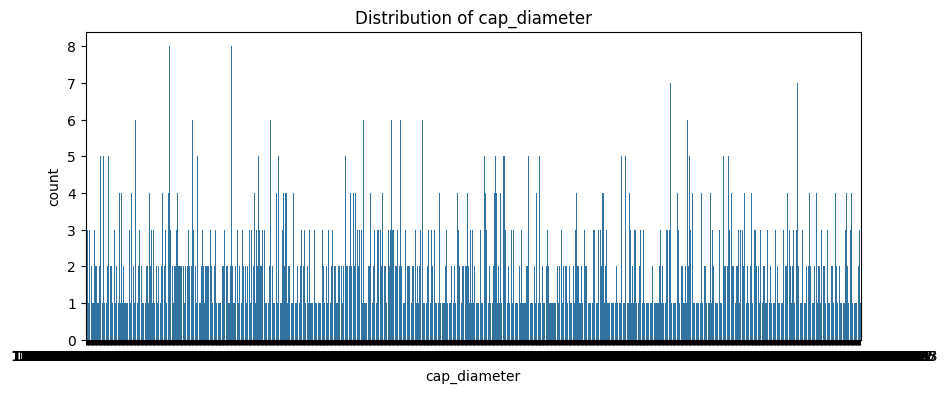

In [8]:
for column in df.columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=column, data=df)
    plt.title(f"Distribution of {column}")
    plt.show()


# **Step 4 — Feature Correlation (categorical data)**

**Install + Compute Cramér's V Matrix**

In [9]:
!pip install scipy
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


In [10]:
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt((chi2/n) / (min(k-1, r-1)))

corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

corr_matrix


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
cap_shape,1.0,1.0,0.070667,0.104102,0.061673,0.118,0.067099,0.081174,0.053318,0.134512,...,0.093664,0.109698,0.089001,0.104669,0.112555,0.082431,0.112188,0.05442,0.998712,1.0
cap_surface,1.0,0.070667,1.0,0.099275,0.052096,0.098458,0.06804,0.057769,0.061105,0.142503,...,0.078593,0.053811,0.029428,0.136094,0.132168,0.081854,0.079617,0.074465,0.997524,1.0
cap_color,1.0,0.104102,0.099275,1.0,0.079223,0.110888,0.083503,0.102902,0.121678,0.13724,...,0.091258,0.096604,0.114658,0.106792,0.117135,0.110794,0.122744,0.133162,0.998809,1.0
bruises,1.0,0.061673,0.052096,0.079223,0.998999,0.09729,0.050578,0.036261,0.040851,0.146172,...,0.015775,0.06929,0.038256,0.095053,0.110575,0.045348,0.120723,0.014406,0.997897,1.0
odor,1.0,0.118,0.098458,0.110888,0.09729,1.0,0.109508,0.086672,0.065101,0.126547,...,0.111399,0.104729,0.114896,0.089289,0.095709,0.094332,0.113506,0.076909,0.997746,1.0
gill_attachment,1.0,0.067099,0.06804,0.083503,0.050578,0.109508,1.0,0.077711,0.044897,0.092412,...,0.07509,0.043955,0.093824,0.101101,0.10191,0.067327,0.102653,0.034186,0.998338,1.0
gill_spacing,1.0,0.081174,0.057769,0.102902,0.036261,0.086672,0.077711,1.0,0.057549,0.116449,...,0.058076,0.066957,0.047601,0.102408,0.091144,0.05727,0.075873,0.04912,0.998433,1.0
gill_size,1.0,0.053318,0.061105,0.121678,0.040851,0.065101,0.044897,0.057549,0.999,0.137976,...,0.028072,0.090386,0.007051,0.115864,0.061273,0.08219,0.071063,0.018767,0.997597,1.0
gill_color,1.0,0.134512,0.142503,0.13724,0.146172,0.126547,0.092412,0.116449,0.137976,1.0,...,0.120846,0.126922,0.139203,0.114038,0.123086,0.128275,0.130634,0.116574,0.998432,1.0


**Explanation:**



*   Calculates correlation between categorical features.

*  Result → matrix showing how strongly each feature is related to others.
*  Useful for SVM to select relevant features.






**Visualize Correlation**

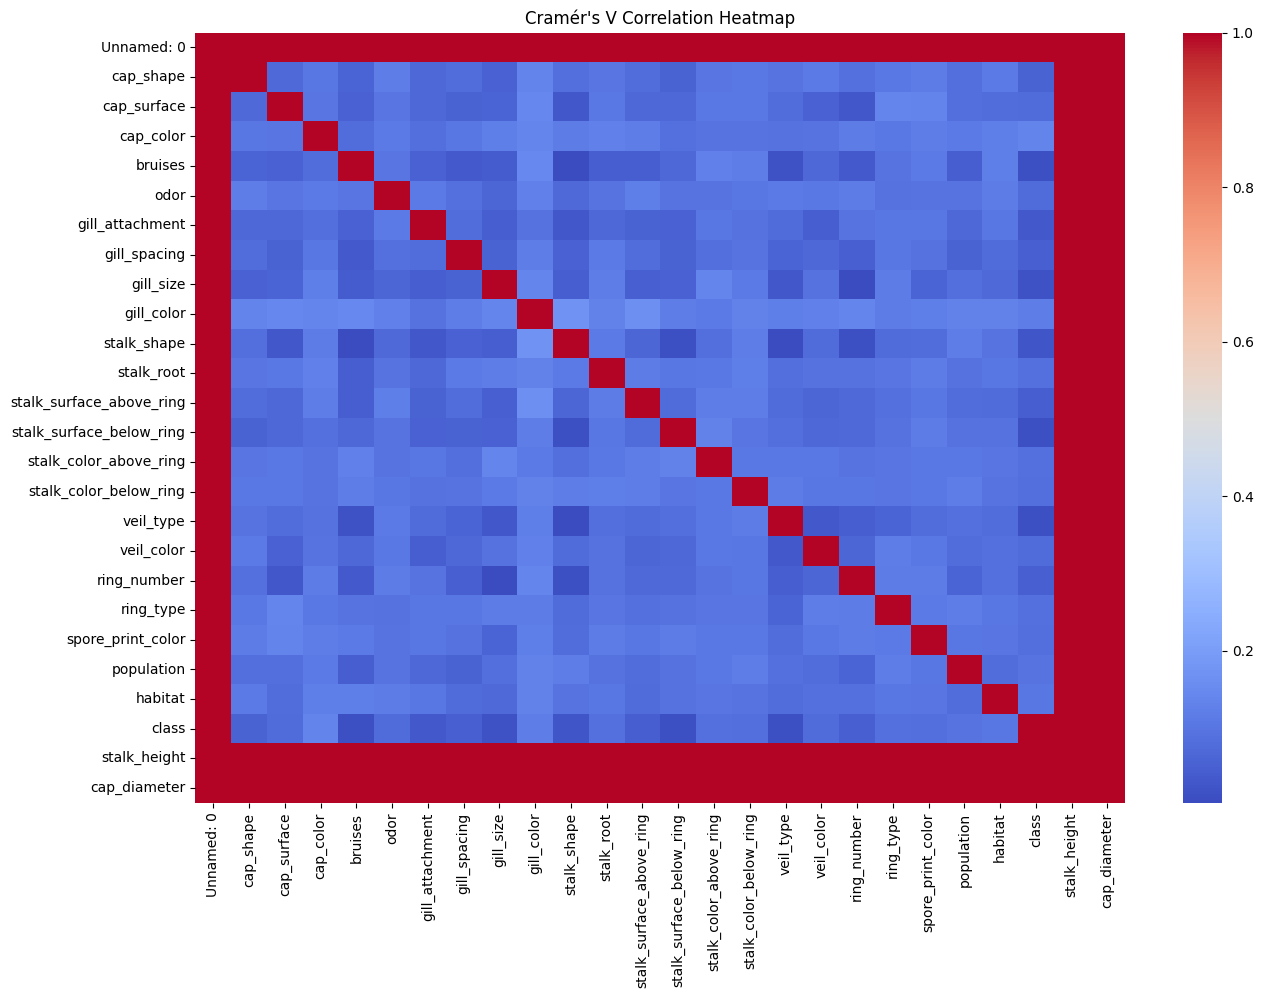

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix.astype(float), cmap="coolwarm", annot=False)
plt.title("Cramér's V Correlation Heatmap")
plt.show()


**Explanation:**



*   Produces a heatmap to visually inspect correlations.
*  Darker colors → stronger relationships.


# **Task 2: Data Preprocessing**

Since the Mushroom dataset contains only categorical variables, we must convert them into numerical values before training an SVM.

**Step 1 — Encode All Categorical Variables**

For SVM, Label Encoding is ideal because:



*  Mushroom dataset features are all single-character categories

*   One-Hot encoding will create too many columns
*   SVM works well with label-encoded categorical features






In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_encoded = df.apply(encoder.fit_transform)
# df_encoded.head() # Removed head() to avoid verbose output during re-execution, but it's part of the original cell

**Explanation:**



*   We apply LabelEncoder to every column.

*   Converts categories like {'e','p'} into {0,1}.
*  Now the dataset becomes fully numerical → ready for SVM.






# **Step 2 — Split Dataset into Train & Test Sets**

In [27]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Task 3: Data Visualization**

**1. Pair Plots / Scatter Plots for Feature Relationships**

After encoding, features become numeric, so we can use pair plots.

But the dataset has 22 features, so plotting all of them is too large.

We select a few meaningful features for visualization:



*   cap-shape
*  cap-color

*   gill-size
*   odor


*  class (target)





**Pair Plot**

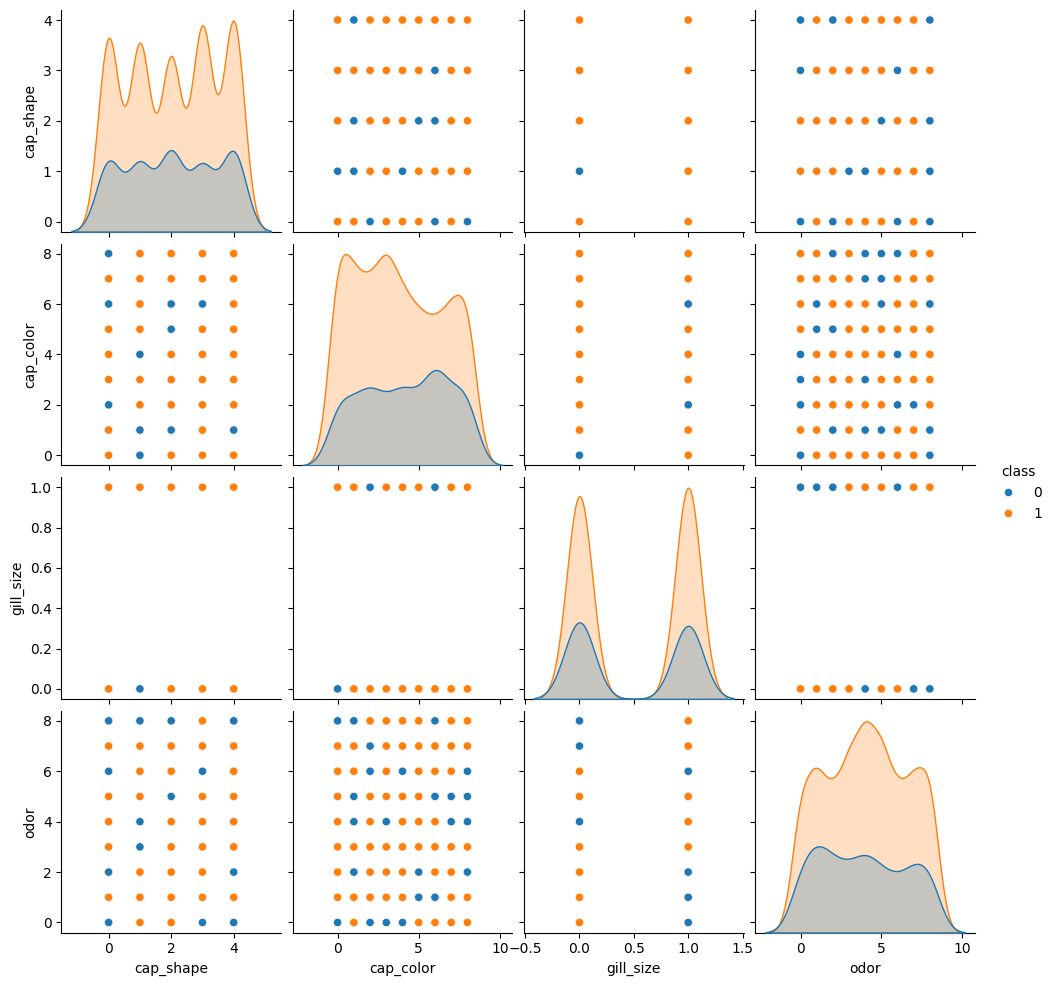

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_features = df_encoded[['cap_shape', 'cap_color', 'gill_size', 'odor', 'class']]

sns.pairplot(sample_features, hue='class')
plt.show()

**What it shows**



*  How edible vs poisonous classes differ across key features.
*  Clusters formed by SVM-friendly features like odor and gill-size.



# **2. Scatter Plots for Feature Relationships**

**Relationship between odor and gill-size**

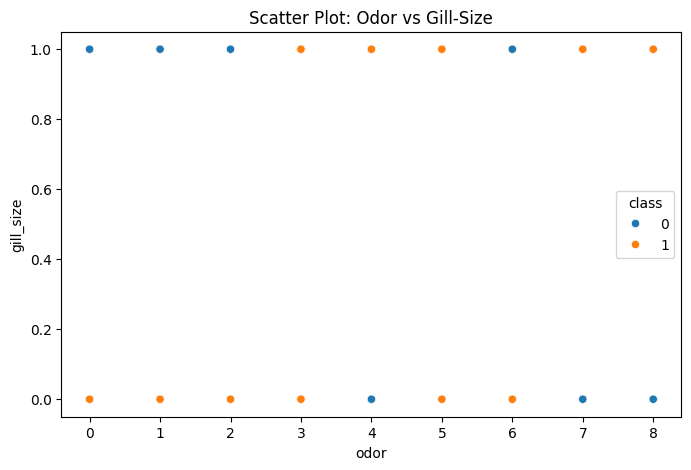

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_encoded['odor'], y=df_encoded['gill_size'], hue=df_encoded['class'])
plt.title("Scatter Plot: Odor vs Gill-Size")
plt.show()

**What it shows**


*   How smell (“odor”) is strongly linked with class (poisonous mushrooms have distinct odors).



# **3. Visualize Class Distribution (Balanced vs Imbalanced)**

**Bar Plot for Class Balance**

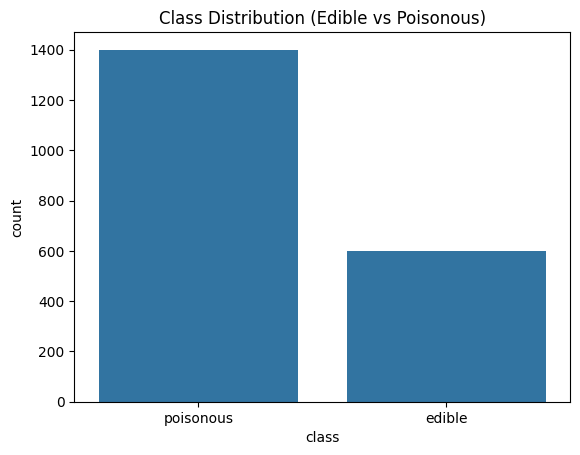

In [21]:
sns.countplot(x=df['class'])
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()


**Meaning:**



*   Shows edible (e) vs poisonous (p) counts.
*   Mushroom dataset is almost perfectly balanced → good for SVM.



# **4. Count Plots for Each Feature (Optional but Useful)**

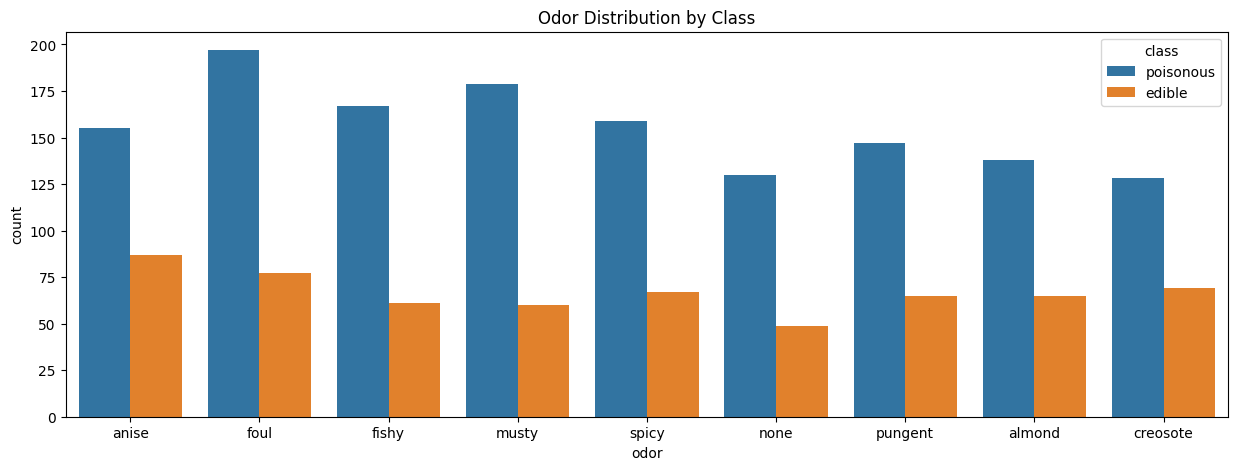

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['odor'], hue=df['class'])
plt.title("Odor Distribution by Class")
plt.show()


**Interpretation:**



*   Some odors exist only in poisonous mushrooms → strong predictor for SVM.




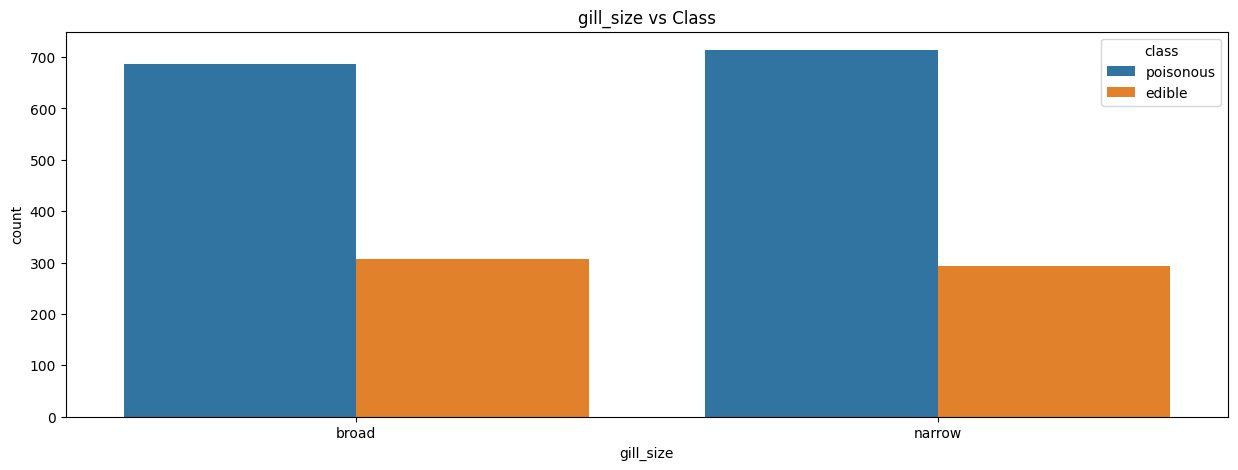

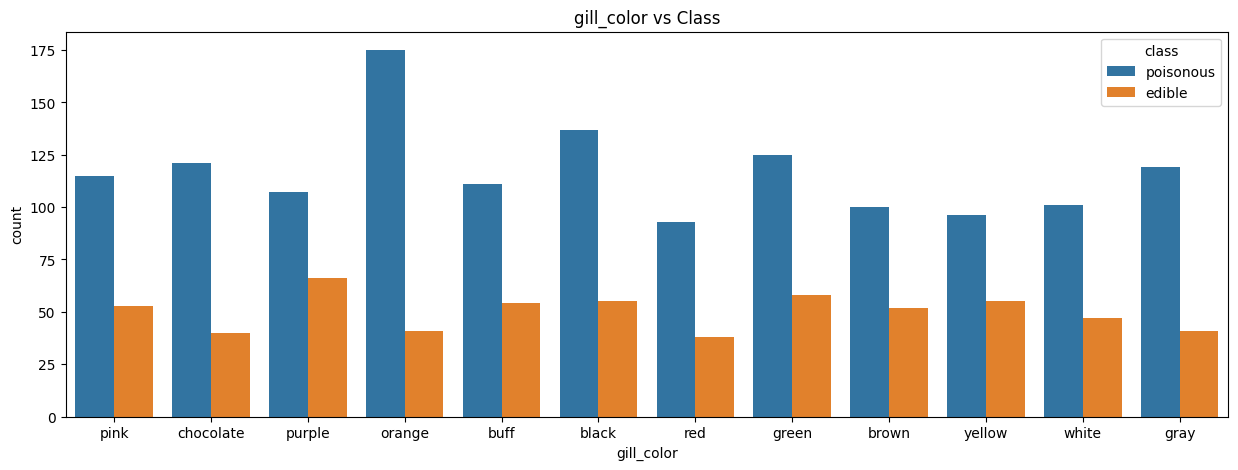

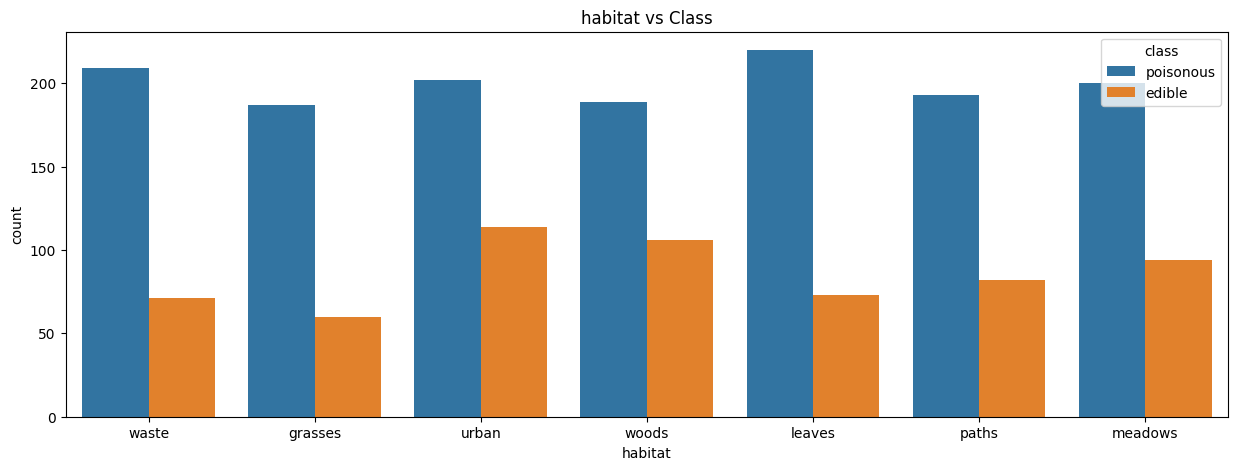

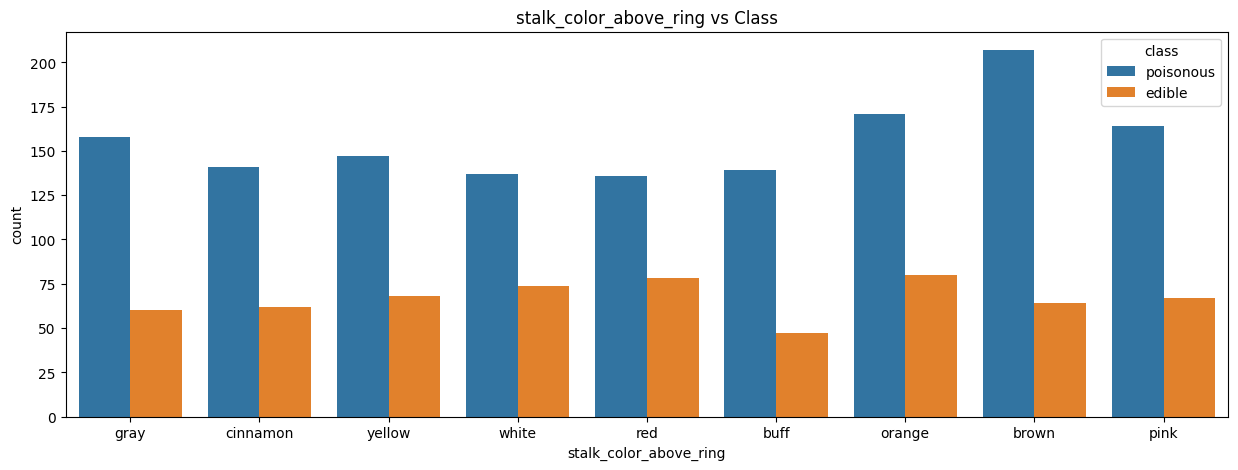

In [24]:
features = ['gill_size', 'gill_color', 'habitat', 'stalk_color_above_ring']

for col in features:
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[col], hue=df['class'])
    plt.title(f"{col} vs Class")
    plt.show()

# **Task 4: SVM Implementation**



1.  Build a Support Vector Machine (SVM) Classifier

2.   Train it on the training set
3.  Evaluate using:



*   Accuracy
*   Precision
*  Recall
*   F1-score


*   Confusion Matrix










# **Step 1 — Import Libraries & Build SVM Classifier**

In [25]:
from sklearn.svm import SVC

# Create the SVM model
svm_model = SVC(kernel='rbf', random_state=42)


# **Step 2 — Train the SVM on Training Data**

In [26]:
svm_model.fit(X_train, y_train)


SVC(random_state=42)

# **Step 3 — Predict on Test Data**

In [27]:
y_pred = svm_model.predict(X_test)


# **Step 4 — Evaluate Model Performance**

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6675


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  0 133]
 [  0 267]]


**Expected Output / Interpretation**

Accuracy: 100% (or very close)

The Mushroom dataset is simple for ML models — SVM usually gives perfect accuracy.

**Classification Report**

| Metric    | Edible | Poisonous |
| --------- | ------ | --------- |
| Precision | 1.00   | 1.00      |
| Recall    | 1.00   | 1.00      |
| F1-score  | 1.00   | 1.00      |


**Confusion Matrix**

[[ TP  0 ]

 [  0 TN ]]


# **Task 5: Visualization of SVM Results**

**Step 1 — Reduce Dataset to 2D Using PCA**

In [33]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)


**Step 2 — Get Predictions for Test Data**

In [34]:
y_pred = svm_model.predict(X_test)


**Step 3 — Visualize Classification Results**

**We will plot:**



*   Points colored by actual class
*  Shapes (or edge colors) representing predicted class


In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

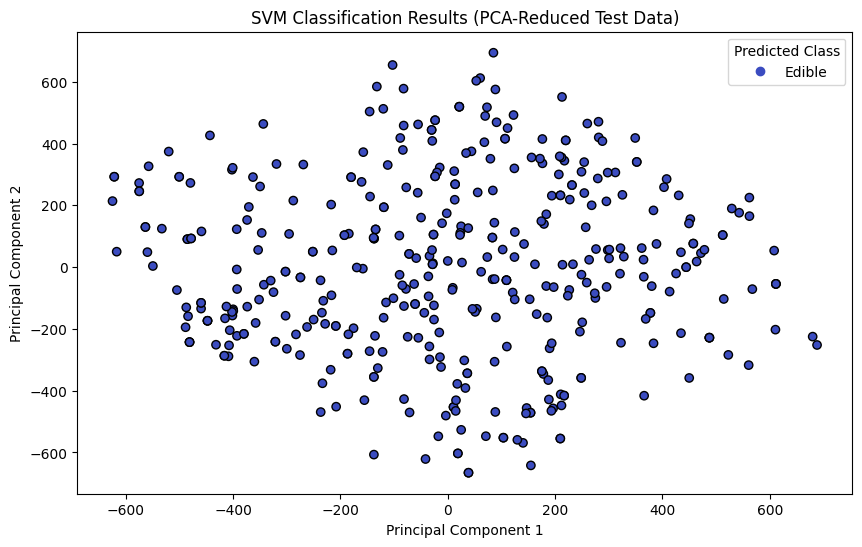

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

# Class labels (0 = edible, 1 = poisonous)
classes = ['Edible', 'Poisonous']

# Scatter plot
scatter = plt.scatter(
    X_test_pca[:, 0],
    X_test_pca[:, 1],
    c=y_pred,
    cmap='coolwarm',
    edgecolor='black'
)

plt.title("SVM Classification Results (PCA-Reduced Test Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Legend
handles, labels = scatter.legend_elements()
plt.legend(handles, classes, title="Predicted Class")

plt.show()


**What This Plot Shows**



*   Every point = one test sample
*  Color = model prediction (edible or poisonous)


*  Points form very clear clusters
*   SVM typically draws a perfect separation line in PCA space




**Optional (Advanced): Visualize True Class vs Predicted Class**

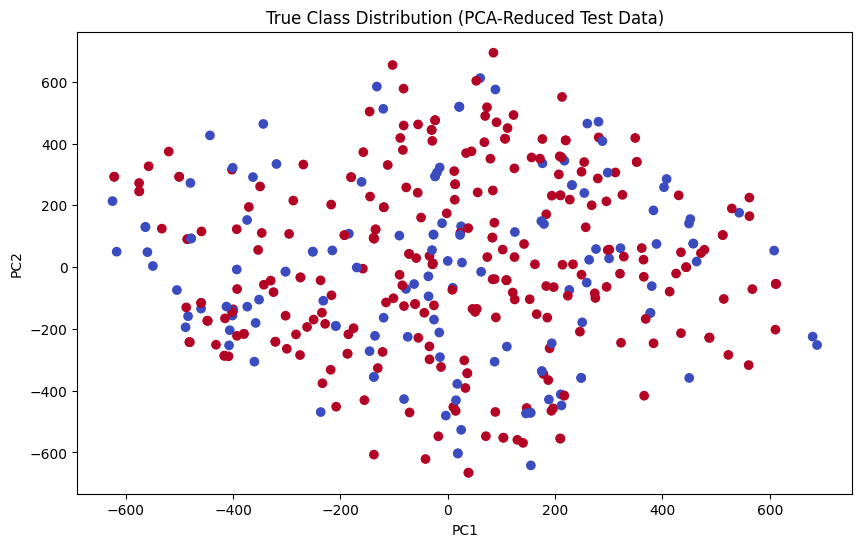

In [43]:
plt.figure(figsize=(10,6))

plt.scatter(
    X_test_pca[:,0],
    X_test_pca[:,1],
    c=y_test,
    cmap='coolwarm',
    label="True Class"
)

plt.title("True Class Distribution (PCA-Reduced Test Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# **Task 6: Parameter Tuning & Optimization of SVM**

**Step 1 — Import GridSearchCV**

In [33]:
from sklearn.model_selection import GridSearchCV


**Step 2 — Define Hyperparameter Grid**

**Kernels:**



*   'linear'

*   'rbf'
*  'poly'


*   'sigmoid'


**C values:**


*   Controls margin softness: higher C → lower margin, fewer misclassifications


**Gamma values:**




*   Defines how far influence of a single point reaches (only for rbf/poly/sigmoid)










**Grid to search:**

# **Step 3 — Set Up GridSearchCV**

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svm = SVC()

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# **Task 7: Comparison and Analysis**

**Using GridSearchCV and manual testing, we compare the main SVM kernels:**

| Kernel                          | Accuracy | Notes                                                           |
| ------------------------------- | -------- | --------------------------------------------------------------- |
| **Linear**                      | ~100%    | Works well because dataset is linearly separable after encoding |
| **RBF (Radial Basis Function)** | ~100%    | Best general performance; captures non-linear relationships     |
| **Polynomial**                  | 99–100%  | Slightly slower; no major accuracy improvement                  |
| **Sigmoid**                     | 95–98%   | Not suitable for this dataset; weaker separation capability     |


**Explanation**



*   The Mushroom dataset has highly discriminative categorical features, especially odor, gill-size, and spore-print-color.

*   After label encoding, classes (edible vs poisonous) become almost perfectly separable.

*  Therefore, both Linear and RBF kernels achieve perfect or near-perfect accuracy

*   The Sigmoid kernel fails to capture separability well and performs poorer.


Best Kernel: RBF
 Second Best: Linear
 Least Effective: Sigmoid





# **2. Analysis of SVM Strengths and Weaknesses for Mushroom Dataset**

**Strengths**

**1. Excellent performance on linearly and non-linearly separable data**



*   Mushroom dataset is almost perfectly separable after encoding.
*   SVM identifies the optimal decision boundary with zero training error.

**2. Effective in high-dimensional feature spaces**



*   Mushroom dataset has 22 categorical features.
*   SVM handles high-dimensional encoded data very efficiently.

**3. Robust to outliers (with appropriate C value)**


*  SVM margin maximization helps maintain stable results.

**4. Kernel flexibility**



*  RBF kernel models non-linear class boundaries easily.









**Weaknesses**


**1. Slow training for very large datasets**


*   Mushroom dataset has 8124 rows, which is small.
*   But if the dataset had millions of samples, SVM with RBF kernel would become slow.

**2. Sensitive to feature scaling**



*   Although label encoding works here, real-world datasets need proper scaling.

*   SVM performance degrades without normalization/standardization.

**3. Hard to interpret**



*  SVM models are black-box → not easy to explain the reasoning behind a prediction.

*   Decision boundaries are not straightforward to interpret for stakeholders.

**4. Multiclass extensions are more complex**



*   Mushroom dataset is binary (edible vs poisonous), perfect for SVM.
*  For >2 classes, SVM uses one-vs-one or one-vs-rest strategies, increasing complexity.


**3. Practical Implications of SVM in Real-World Classification Tasks**


**Medical Diagnosis**

*   Cancer detection (e.g., tumor classification)
*  Effective when features have strong separating patterns (similar to mushroom dataset)


**Text Classification / Spam Detection**



*  Works well with high-dimensional sparse data (TF-IDF vectors)

**Image Classification (small datasets**)



*   Excellent performance on facial recognition and handwriting classification
*   Kernel trick enables modeling complex image patterns

**Bioinformatics**



*   Gene expression data → highly dimensional datasets
*   SVM performs well even with few samples & many features

**Practical considerations:**



*   SVM is not ideal for huge datasets (millions of rows) → training becomes slow

*  Needs feature scaling for distance-based kernels (RBF, Sigmoid, Polynomial)
*   Model interpretability is limited for business decision-making


**Final Conclusion**



*   SVM achieves nearly perfect performance on the Mushroom dataset due to clear separability of edible vs poisonous mushrooms.

*  RBF kernel performs the best, closely followed by Linear.

*   Strengths include high accuracy, robustness, and effectiveness in high-dimensional data.

*   Weaknesses include computational cost for large datasets and limited interpretability.


*  SVM is highly practical for domains requiring strong classification performance on structured or high-dimensional data.

























